<a href="https://colab.research.google.com/github/Auroraleone/MLDLproject-/blob/main/Evaluation%26Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evaluation

In [ ]:
import os
import subprocess

main_directory = '/content/drive/MyDrive/MLandDL/Project/Predizioni'
for model in os.listdir(main_directory):
    print(f"Evaluating {model}")
    predictions = os.listdir(os.path.join(main_directory, model))[-1]
    pred_path = os.path.join(main_directory, model, predictions)

    command = [
        'python', '/content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py',
        '--ground_truth_json', '/content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json',
        '--model_prediction_json', pred_path,
        '--thresholds', '0.3', '0.5',
        '--topK', '1', '5'
    ]

    result = subprocess.run(command, capture_output=True, text=True)
    print(result.stdout)
    if result.stderr:
        print(result.stderr)


Evaluating VSLNET_omnivore_BERT
Reading predictions: /content/drive/MyDrive/MLandDL/Project/Predizioni/VSLNET_omnivore_BERT/vslnet_9_3220_preds (1).json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 3874 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   6.48   |   3.72   |  14.04   |   8.67   | 5.04 |
+----------+----------+----------+----------+------+

Evaluating VSLBASE_EgoVLP_BERT
Reading predictions: /content/drive/MyDrive/MLandDL/Project/Predizioni/VSLBASE_EgoVLP_BERT/vslnet_9_3230_preds.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 3874 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+---

##Ensemble

In [ ]:
%%bash

# Pipeline:

# NOTE: Just the PRIOR voting scheme and the MIOU metric, specifying, MIOU_CHOICE = 3, i.e. their miou.

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best1.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble1.json \
    --thresholds 0.3 0.5 \
    --topK 1 5


Reading predictions: /content/model_best1.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.70   |   5.56   |  17.76   |  11.27   | 7.28 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble1.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  10.33   |   6.18   |  17.53   |  10.41   | 7.60 |
+----------+----------+----------+----------+------+


In [ ]:
%%bash

# Pipeline:

# NOTE: Just the POSTERIOR voting scheme and the MIOU metric, specifying, MIOU_CHOICE = 3, i.e. their miou.

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best2.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble2.json \
    --thresholds 0.3 0.5 \
    --topK 1 5


Reading predictions: /content/model_best2.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.70   |   5.56   |  17.76   |  11.27   | 7.28 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble2.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  11.03   |   6.96   |  15.34   |   9.78   | 8.16 |
+----------+----------+----------+----------+------+


In [ ]:
%%bash

# Pipeline:

# NOTE: Just the PRIOR voting scheme and the MIOU metric, specifying, MIOU_CHOICE = 0.

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best3.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble3.json \
    --thresholds 0.3 0.5 \
    --topK 1 5



Reading predictions: /content/model_best3.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.55   |   5.79   |  17.92   |  11.42   | 7.18 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble3.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  10.33   |   6.10   |  17.68   |  10.80   | 7.57 |
+----------+----------+----------+----------+------+


In [ ]:
%%bash

# Pipeline:

# NOTE: Just the POSTERIOR voting scheme and the MIOU metric, specifying, MIOU_CHOICE = 0.

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best4.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble4.json \
    --thresholds 0.3 0.5 \
    --topK 1 5



Reading predictions: /content/model_best4.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.55   |   5.79   |  17.92   |  11.42   | 7.18 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble4.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  11.11   |   6.81   |  15.34   |   9.78   | 8.17 |
+----------+----------+----------+----------+------+


In [ ]:
%%bash

# Pipeline:

# NOTE: Just the PRIOR voting scheme and the R@n IoU metric

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best5.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble5.json \
    --thresholds 0.3 0.5 \
    --topK 1 5



Reading predictions: /content/model_best5.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.55   |   5.79   |  17.92   |  11.42   | 7.18 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble5.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  10.41   |   6.03   |  17.61   |  10.49   | 7.57 |
+----------+----------+----------+----------+------+


In [ ]:
%%bash

# Pipeline:

# NOTE: Just the POSTERIOR voting scheme and the R@n IoU metric

# SUPPOSED BEST MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_best6.json \
    --thresholds 0.3 0.5 \
    --topK 1 5

# ENSEMBLE MODEL #

# To evaluate predictions using official evaluation script.

python /content/episodic-memory_Auro/NLQ/VSLNet/utils/evaluate_ego4d_nlq.py \
    --ground_truth_json /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json \
    --model_prediction_json /content/model_ensemble6.json \
    --thresholds 0.3 0.5 \
    --topK 1 5




Reading predictions: /content/model_best6.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|   9.55   |   5.79   |  17.92   |  11.42   | 7.18 |
+----------+----------+----------+----------+------+
Reading predictions: /content/model_ensemble6.json
Reading gt: /content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json
Evaluated: 1278 / 3875 instances
+----------+----------+----------+----------+------+
|  Rank@1  |  Rank@1  |  Rank@5  |  Rank@5  | mIoU |
| mIoU@0.3 | mIoU@0.5 | mIoU@0.3 | mIoU@0.5 |      |
+----------+----------+----------+----------+------+
|  11.35   |   6.89   |  15.57   |   9.78   | 8.18 |
+----------+----------+----------+----------+------+


#Comparison

###General

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/MLandDL/Project/BASELINE_MODELS

###Predicted moment length error

In [ ]:
def compute_legth_error(predictions, gt):
    gt_dict = {}
    num_gt_queries = 0

    for video_datum in gt["videos"]:
        for clip_datum in video_datum["clips"]:
            clip_uid = clip_datum["clip_uid"]
            for ann_datum in clip_datum["annotations"]:
                key = (clip_uid, ann_datum["annotation_uid"])
                gt_dict[key] = ann_datum
                num_gt_queries += len(ann_datum["language_queries"])
    results = []
    for pred_datum in predictions["results"]:
        key = (pred_datum["clip_uid"], pred_datum["annotation_uid"])
        assert key in gt_dict, "Instance not present!"
        query_id = pred_datum["query_idx"]
        gt_datum = gt_dict[key]
        gt_query_datum = gt_datum["language_queries"][query_id]
        top_pred = pred_datum["predicted_times"][0]
        results.append((top_pred[1]-top_pred[0])-( gt_query_datum["clip_end_sec"]-gt_query_datum["clip_start_sec"]))
    return results


In [ ]:
import json
import pprint
def open_json(filename):
  # Open the JSON file
  with open(filename, 'r') as f:
    # Load the JSON data
    data = json.load(f)
  return data


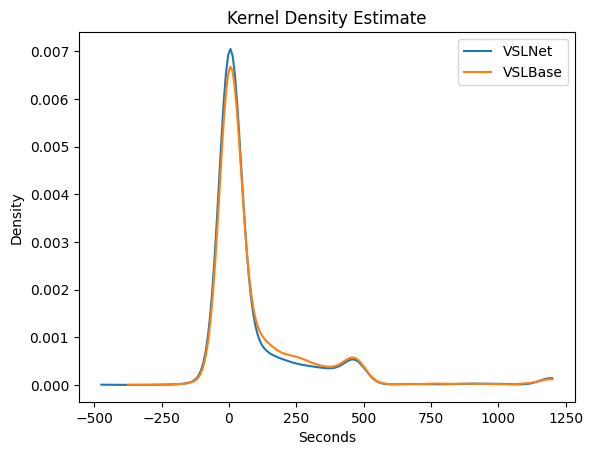

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
preds1 = open_json('/content/drive/MyDrive/MLandDL/Project/Predizioni/VSLNET_EgoVLP_BERT/vslnet_9_3230_preds (1).json')
grt = open_json("/content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json")
preds2 = open_json("/content/drive/MyDrive/MLandDL/Project/Predizioni/VSLBASE_EgoVLP_BERT/vslnet_9_3230_preds.json")
res1 = compute_legth_error(preds1, grt)
res2 = compute_legth_error(preds2, grt)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Your observations
observations1 = np.array(res1)
observations2 = np.array(res2)
# Calculate the kernel density estimate
kde1 = gaussian_kde(observations1)
kde2 = gaussian_kde(observations2)
# Create a range of x-values for plotting
x_vals1 = np.linspace(min(observations1), max(observations1), 200)
x_vals2 = np.linspace(min(observations2), max(observations2), 200)
# Evaluate the density at the x-values
density1 = kde1(x_vals1)
density2 = kde2(x_vals2)
# Plot the density
plt.plot(x_vals1, density1, label='VSLNet')
plt.plot(x_vals2, density2, label='VSLBase')

plt.xlabel('Seconds')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')

# Adding a legend
plt.legend()

plt.show()

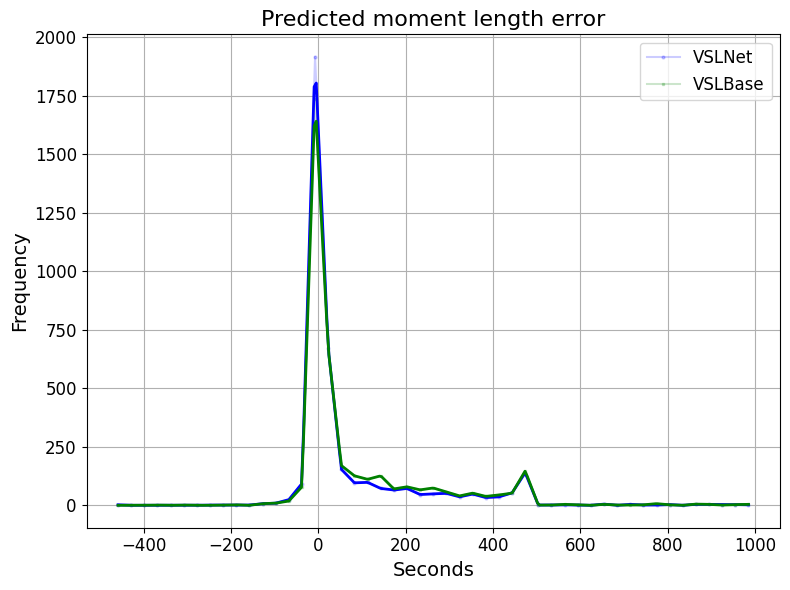

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
preds1 = open_json('/content/drive/MyDrive/MLandDL/Project/Predizioni/VSLNET_EgoVLP_BERT/vslnet_9_3230_preds (1).json')
grt = open_json("/content/drive/MyDrive/MLandDL/Project/annotations/nlq_val.json")
preds2 = open_json("/content/drive/MyDrive/MLandDL/Project/Predizioni/VSLBASE_EgoVLP_BERT/vslnet_9_3230_preds.json")
res1 = compute_legth_error(preds1, grt)
res2 = compute_legth_error(preds2, grt)
import matplotlib.pyplot as plt
import numpy as np
observations1 = np.array(res1)
observations2 = np.array(res2)

# Create bins for histogram
bins = np.linspace(min(min(observations1), min(observations2)), 1000, 50)

# Compute histograms
hist1, _ = np.histogram(observations1, bins=bins, density=False)
hist2, _ = np.histogram(observations2, bins=bins, density=False)

# Calculate bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plot the histograms as smooth lines with interpolation
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(bin_centers, hist1, color='blue', linestyle='-', marker='o', markersize=2, label='VSLNet', alpha=0.2)
plt.plot(bin_centers, hist2, color='green', linestyle='-', marker='s', markersize=2, label='VSLBase', alpha=0.2)

# Smooth lines with interpolation
smooth_x = np.linspace(bin_centers.min(), bin_centers.max(), 300)
smooth_hist1 = np.interp(smooth_x, bin_centers, hist1)
smooth_hist2 = np.interp(smooth_x, bin_centers, hist2)

plt.plot(smooth_x, smooth_hist1, color='blue', linestyle='-', linewidth=2)
plt.plot(smooth_x, smooth_hist2, color='green', linestyle='-', linewidth=2)

plt.xlabel('Seconds', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Predicted moment length error', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)

plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

###init_lr

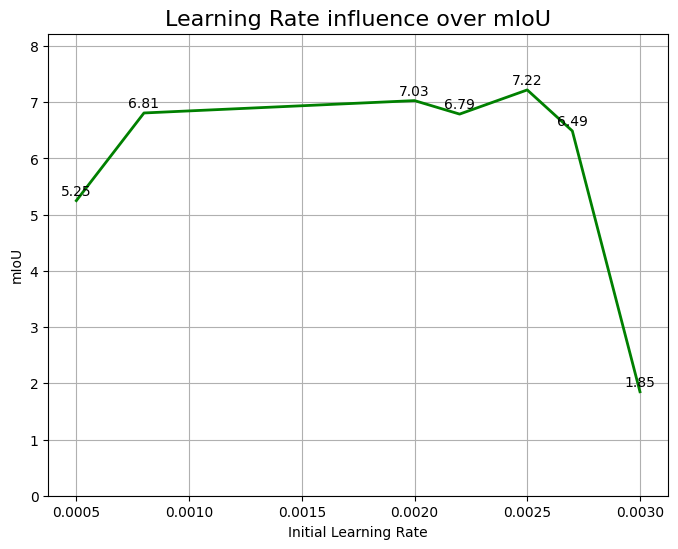

In [ ]:
import matplotlib.pyplot as plt

# Data
learning_rates = [0.0005, 0.0008, 0.002, 0.0022, 0.0025, 0.0027, 0.003]
miou = [5.25, 6.81, 7.03, 6.79, 7.22, 6.49, 1.85]

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, miou, linestyle='-', color='g', markersize=6, linewidth=2)

# Beautify the plot
plt.title('Learning Rate influence over mIoU', fontsize=16)
plt.xlabel('Initial Learning Rate', fontsize=10)
plt.ylabel('mIoU', fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(miou) + 1)  # Add some space above the highest point

# Annotate the points
for lr, miou_val in zip(learning_rates, miou):
    plt.text(lr, miou_val + 0.1, f'{miou_val}', ha='center', fontsize=10)

# Display the plot
plt.show()


###lambda

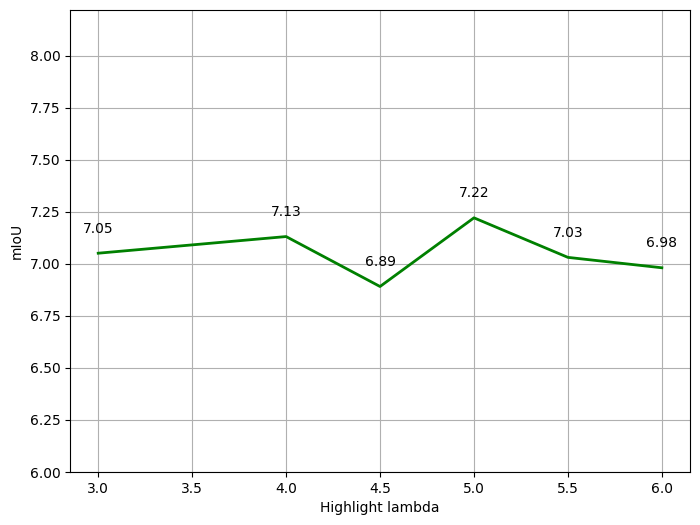

In [ ]:
import matplotlib.pyplot as plt

# Data
lambda_values = [3.0, 4.0, 4.5, 5.0, 5.5, 6.0]
miou = [7.05, 7.13, 6.89,  7.22, 7.03,  6.98]
r1iou05 = [5.6, 5.73, 5.45, 5.50, 5.39, 5.52]

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, miou, linestyle='-', color='g', markersize=6, linewidth=2)

# Beautify the plot
plt.xlabel('Highlight lambda', fontsize=10)
plt.ylabel('mIoU', fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(6, max(miou) + 1)  # Add some space above the highest point

# Annotate the points
for lr, miou_val in zip(lambda_values, miou):
    plt.text(lr, miou_val + 0.1, f'{miou_val}', ha='center', fontsize=10)

# Display the plot
plt.show()

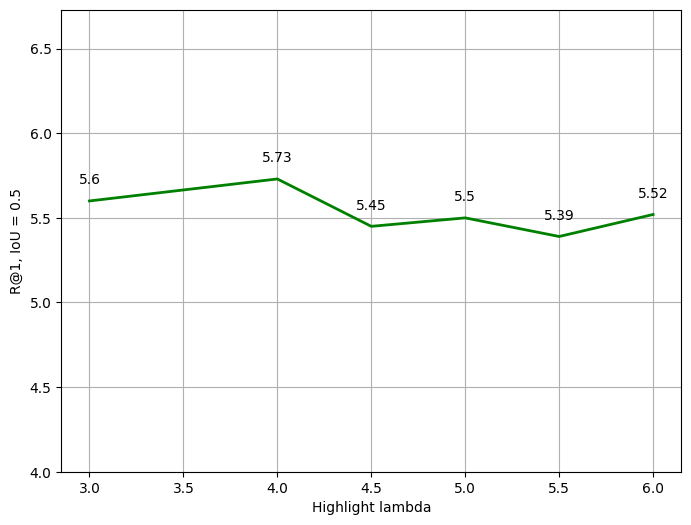

In [ ]:
import matplotlib.pyplot as plt

# Data
lambda_values = [3.0, 4.0, 4.5, 5.0, 5.5, 6.0]
miou = [7.05, 7.13, 6.89,  7.22, 7.03,  6.98]
r1iou05 = [5.6, 5.73, 5.45, 5.50, 5.39, 5.52]

# Create plot
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, r1iou05, linestyle='-', color='g', markersize=6, linewidth=2)

# Beautify the plot
plt.xlabel('Highlight lambda', fontsize=10)
plt.ylabel('R@1, IoU = 0.5', fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(4, max(r1iou05) + 1)  # Add some space above the highest point

# Annotate the points
for lr, r_val in zip(lambda_values, r1iou05):
    plt.text(lr, r_val + 0.1, f'{r_val}', ha='center', fontsize=10)

# Display the plot
plt.show()